In [4]:
import pandas as pd
import numpy as np
import pickle
from dataproc import DataProc
from cluster_model import ClusterPattern
from clf_model import ClassfyLabel
from pred_model import PredictUsage

In [17]:
# Declare instance for data processing
dp = DataProc()
dp.data

,AveragePower,rn,ss,icsr,dsnw,ct_Ci,ct_Cc,ct_Cs,ct_Ac,ct_As,...,day__5,day__6,weekdays,weekend,wd_x,wd_y,power_yesterday,power_ema4,power_ema7,power_ema14
Time,,,,,,,,,,,,,,,,,,,,,
2022-03-02,4484.162226,0.000000,10.7,19.53,0.0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,-0.773385,-0.313895,3118.787858,3118.787858,3118.787858,3118.787858
2022-03-03,4004.804565,0.000000,10.6,19.16,0.0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,-0.834277,-0.282229,4484.162226,3877.329174,3846.987521,3825.015979
2022-03-04,2484.763983,0.000000,3.7,10.65,0.0,3,0,0,1,3,...,0.0,0.0,1.0,0.0,0.081323,-0.071874,4004.804565,3929.573186,3906.752555,3889.124429
2022-03-05,0.000000,0.000000,10.5,20.26,0.0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,-0.937869,-0.005698,2484.763983,3440.139174,3477.219724,3500.909464
2022-03-06,0.000000,0.000000,10.8,21.00,0.0,2,0,0,0,0,...,0.0,1.0,0.0,1.0,-0.937759,0.053003,0.000000,2416.775546,2584.876388,2700.942226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15,2096.542920,2.133333,0.1,5.35,0.0,0,0,0,1,14,...,0.0,0.0,1.0,0.0,0.855381,0.478153,2320.783620,2295.144532,2234.868922,2173.180031
2023-09-16,1449.364409,30.000000,0.1,6.30,0.0,0,0,0,1,16,...,1.0,0.0,0.0,1.0,0.624741,0.522802,2096.542920,2255.424210,2217.578171,2168.070890
2023-09-17,1532.291780,11.800000,3.3,12.49,0.0,9,0,0,8,1,...,0.0,1.0,0.0,1.0,-0.296609,0.338147,1449.364409,2094.212250,2121.551451,2120.157125


In [19]:
# Dataset that Data augmentation is applied
# X_train, X_test, y_train, y_test = dp.data_augmentation(save=False)
with open('data/augmented_data.pickle', 'rb') as file:
    X_train, X_test, y_train, y_test = pickle.load(file)
# dp.view_figure(dp.augmented_data, figure_type=0, save=True) 
# dp.view_figure(dp.augmented_data, figure_type=0, save=False) 

In [6]:
# Train prediction model
model = PredictUsage()
model.fit(X_train, y_train)

opt_n_estimators,opt_max_depth,opt_learning_rate:  (100, 5, 0.1)
[0.00454272 0.03526087 0.01076889 0.00680698 0.00617362 0.02953622
 0.01428733 0.03572901 0.00813499 0.0017026  0.01267025 0.05092072
 0.01259931 0.22928192 0.0052543  0.00871693 0.3503515  0.13348208
 0.00827806 0.03550171]


In [7]:
# Predict eletricity usage
y_pred = model.predict(X_test)

In [8]:
# Make DataFrame
pred_result = pd.DataFrame({'true': y_test, 'pred': y_pred}, index=X_test.index)

In [9]:
# Calculate error of each label
error = model.calculate_error(y_test, y_pred)
error

/workspace/AMI/BA/pred_model.py:81: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


{'MAE': 253.08780947187225, 'RMSE': 356.3396745080897, 'MAPE': inf}

<Figure size 1440x576 with 0 Axes>

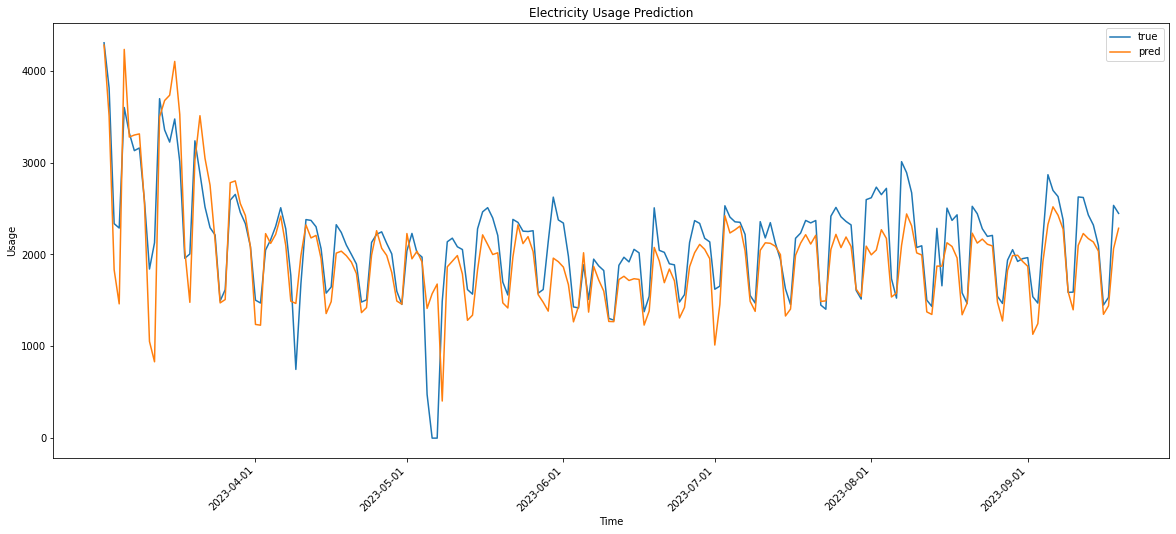

<Figure size 432x288 with 0 Axes>

In [10]:
# Visualize prediction result
dp.view_figure(pred_result, figure_type=2, save=True)
dp.view_figure(pred_result, figure_type=2, save=False)

In [12]:
y_train

Time
2022-03-02    4484.162226
2022-03-03    4004.804565
2022-03-04    2484.763983
2022-03-05       0.000000
2022-03-06       0.000000
                 ...     
2027-02-24    4138.417071
2027-02-25    2173.861264
2027-02-26    2369.708650
2027-02-27    3677.979680
2027-02-28    3805.787951
Name: AveragePower, Length: 1821, dtype: float64

In [13]:
with open('results/pattern_labels.pickle', 'rb') as file:
    loaded_data = pickle.load(file)
    
y_train['label'] = loaded_data

In [20]:
y_train

Time
2022-03-02    4484.162226
2022-03-03    4004.804565
2022-03-04    2484.763983
2022-03-05       0.000000
2022-03-06       0.000000
                 ...     
2027-02-24    4138.417071
2027-02-25    2173.861264
2027-02-26    2369.708650
2027-02-27    3677.979680
2027-02-28    3805.787951
Name: AveragePower, Length: 1821, dtype: float64

In [58]:
from datetime import datetime, timedelta

In [62]:
dateTime[0]+np.timedelta64(12, 'h')

numpy.datetime64('2022-03-02T12:00:00.000000000')

In [73]:
labels

,label
Time,
2022-03-02,0
2022-03-03,1
2022-03-04,1
2022-03-05,0
2022-03-06,2
...,...
2027-02-24,1
2027-02-25,1
2027-02-26,0


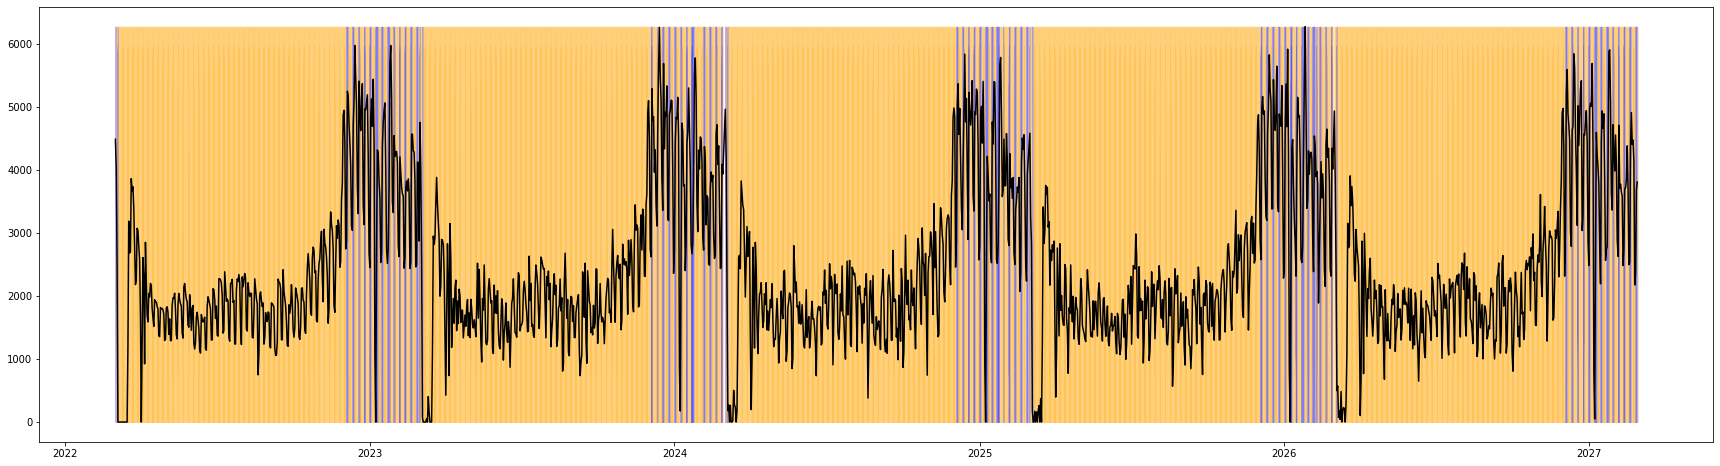

In [78]:
dateTime = np.array(y_train.index)
elec = y_train.values

plt.figure(figsize=(30, 8))
for date in dateTime:
    if labels.loc[date].any() == 0:
        color='b'
    elif labels.loc[date].any() == 1:
        color='orange'
    else:
        color='g'
    plt.fill_between(date, elec, where=(date > date-np.timedelta64(12, 'h')) & (date < date+np.timedelta64(12, 'h')), color=color, alpha=0.4)
plt.plot(dateTime, elec, 'black')
    
plt.show()

ValueError: where size (2) does not match x size (100)

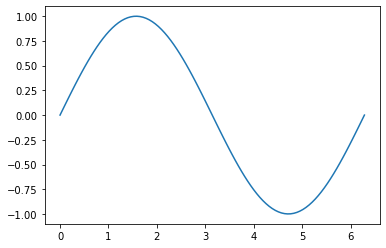

In [47]:
# 데이터 생성
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# 그래프 그리기
plt.plot(x, y, label='sin(x)')

# 영역 색칠하기
plt.fill_between(x, y, where=(x > 1) & (x < 3), color='b', alpha=0.3, label='Area between 1 and 3')
plt.fill_between(x, y, where=(x > 4) & (x < 5), alpha=0.3, label='Area between 1 and 3')

# 그래프에 레이블 추가
plt.xlabel('x')
plt.ylabel('y')
plt.title('Filled Area under the Curve')
plt.legend()

# 그래프 표시
plt.show()